In [1]:
import matplotlib.pyplot as plt
import sarracen as src
import numpy as np

In [2]:
sdf = src.read_csv('../Data/results/toy_star_2D.csv')
sdf

,m,x,y,vx,vy,u,h,rho
0,0.02,0.030905,-0.137339,0.002247,-0.005719,0.084005,0.116595,2.118534
1,0.02,-0.101653,-0.287432,0.000887,0.003701,0.115270,0.125257,1.835651
2,0.02,0.401665,0.433146,0.005682,0.008924,-0.621100,0.183528,0.855038
3,0.02,-0.140161,0.420950,0.001632,-0.010906,-0.127399,0.143436,1.399825
4,0.02,-0.093053,0.078841,0.002497,-0.002081,-0.088076,0.115754,2.149413
...,...,...,...,...,...,...,...,...
95,0.02,0.090605,-0.233992,0.000269,-0.001939,0.010858,0.121328,1.956472
96,0.02,-0.341477,0.129250,-0.008874,-0.000234,0.000000,0.131270,1.671320
97,0.02,-0.268015,-0.143722,0.003656,-0.003249,0.000000,0.125250,1.835859
98,0.02,0.290995,0.050432,0.004410,-0.000276,0.000000,0.125333,1.833407


<Axes: xlabel='x', ylabel='y'>

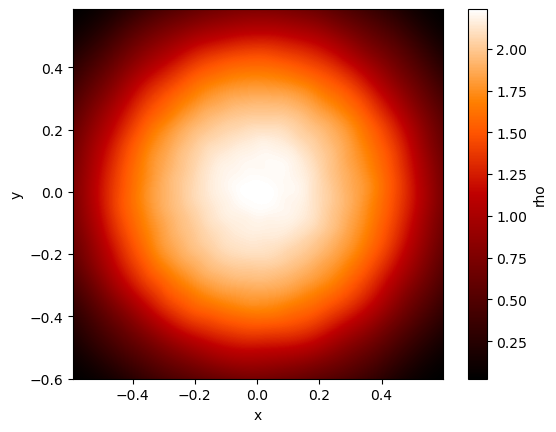

In [3]:
sdf.render('rho', xsec=0.0)

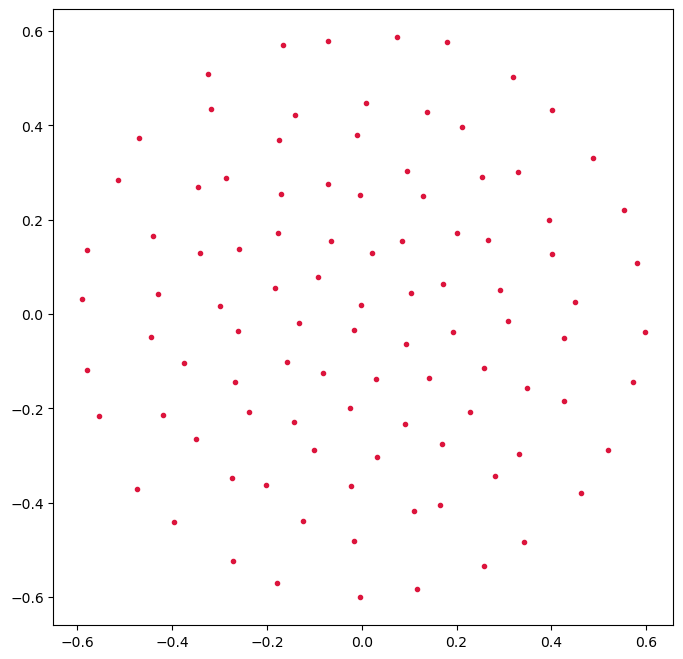

In [4]:
fig = plt.figure(figsize=(8,8))
plt.plot(sdf['x'], sdf['y'], '.', color='crimson')
plt.show()

In [5]:
def density_theo(r, R, lmbda, k):
    return lmbda/(4*k)*(R**2-r**2)

In [6]:
R = 0.75
k = 0.1
M = 2.0
n = 1.0
lmbda = 2*k / (np.pi**(1/n)) * (M*(1+n)/R**2)**(1+1/n)/M

In [7]:
r = np.linspace(0.001, 1.1*R, 100)
dens = density_theo(r, R, lmbda, k)

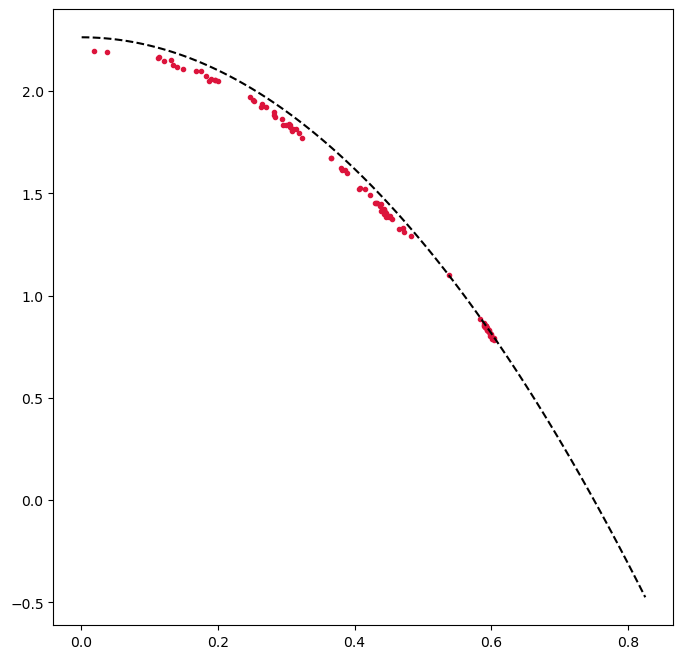

In [8]:
fig = plt.figure(figsize=(8,8))
plt.plot(np.sqrt(sdf['x']**2+sdf['y']**2), sdf['rho'], '.', color='crimson')
plt.plot(r, dens, '--', color='k')
plt.show()